**Fasnacht / Schmutziger Donnerstag**:
27.02. - 05.03.25 | Marktstätte, Stephansplatz, Bodanplatz

**Seenachtfest**:
09.08.25, seit 1949 | Stadtgarten

**Gassenfreitage**:
Mai - Oktober, 1. Freitag im Monat | Niederburg (Stephansplatz?)

**Campus Festival**:
30./31.05.25 | Hörnle

**Grenzüberschreitender Flohmarkt (24h)**:
28./29.06.25  | Herosé, Stephansplatz, Europapark, (Döbele)

**Internationale Bodenseewoche**:
13./15.06.25 | Stadtgarten

**Weinfest**:
30.07 - 02.08.25 | Stephansplatz

**Weihnachtsmarkt**:
27.11. - 23.12.25 | Marktstätte, Stadtgarten

Nicht abgedeckt: Mainaustraße, Staad, Friedrichstraße, Riedstraße

In [8]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


In [2]:
feste_df = pd.read_csv("Feste.csv", sep=";")
feste_df

,Fest,Starttag,Endtag,Orte,Anmerkung
0,Fasnacht / Schmutziger Donnerstag,27.02.25,05.03.25,"Marktstätte, Stephansplatz, Bodanplatz",NaN
1,Seenachtfest,09.08.25,09.08.25,Stadtgarten,seit 1949
2,Gassenfreitage,01.05.25,31.10.25,Niederburg (Stephansplatz?),1. Freitag im Monat
3,Campus Festival,30.05.25,31.05.25,Hörnle,NaN
4,Grenzüberschreitender Flohmarkt (24h),28.06.25,29.06.25,"Herosé, Stephansplatz, Europapark, (Döbele)",NaN
5,Internationale Bodenseewoche,13.06.25,15.06.25,Stadtgarten,NaN
6,Weinfest,30.07.25,02.08.25,Stephansplatz,NaN
7,Weihnachtsmarkt,27.11.25,23.12.25,"Marktstätte, Stadtgarten",NaN


In [6]:
# CSV-Datei einlesen
datei = "Feste.csv"
df = pd.read_csv(datei, delimiter=';', parse_dates=['Starttag', 'Endtag'], dayfirst=True)
df

C:\Users\majaf\AppData\Local\Temp\ipykernel_15872\1416615886.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(datei, delimiter=';', parse_dates=['Starttag', 'Endtag'], dayfirst=True)
C:\Users\majaf\AppData\Local\Temp\ipykernel_15872\1416615886.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(datei, delimiter=';', parse_dates=['Starttag', 'Endtag'], dayfirst=True)


,Fest,Starttag,Endtag,Orte,Anmerkung
0,Fasnacht / Schmutziger Donnerstag,2025-02-27,2025-03-05,"Marktstätte, Stephansplatz, Bodanplatz",NaN
1,Seenachtfest,2025-08-09,2025-08-09,Stadtgarten,seit 1949
2,Gassenfreitage,2025-05-01,2025-10-31,Niederburg (Stephansplatz?),1. Freitag im Monat
3,Campus Festival,2025-05-30,2025-05-31,Hörnle,NaN
4,Grenzüberschreitender Flohmarkt (24h),2025-06-28,2025-06-29,"Herosé, Stephansplatz, Europapark, (Döbele)",NaN
5,Internationale Bodenseewoche,2025-06-13,2025-06-15,Stadtgarten,NaN
6,Weinfest,2025-07-30,2025-08-02,Stephansplatz,NaN
7,Weihnachtsmarkt,2025-11-27,2025-12-23,"Marktstätte, Stadtgarten",NaN


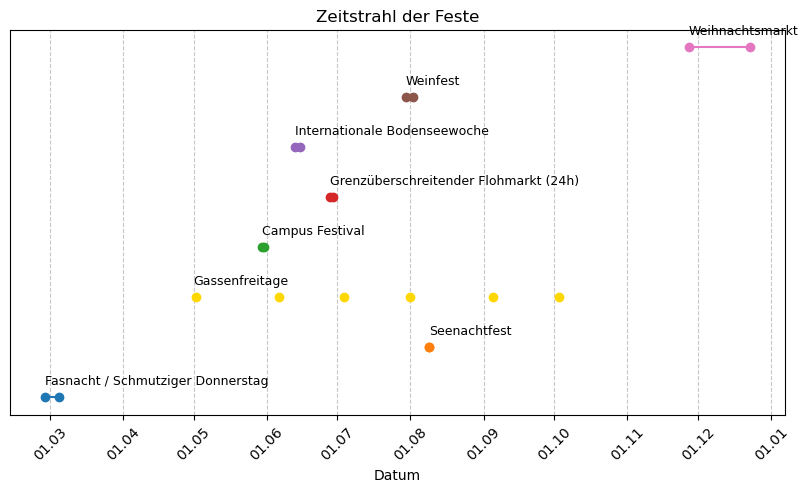

In [12]:
# Umwandlung der Daten in das aktuelle Jahr (falls nötig)
aktuelles_jahr = datetime.now().year
# df['Starttag'] = pd.to_datetime(df['Starttag'].astype(str) + f'.{aktuelles_jahr}', format='%d.%m.%Y')
# df['Endtag'] = pd.to_datetime(df['Endtag'].astype(str) + f'.{aktuelles_jahr}', format='%d.%m.%Y')

# Zeitstrahl erstellen
fig, ax = plt.subplots(figsize=(10, 5))

for index, row in df.iterrows():
    if "Gassenfreitage" in row['Fest']:
        # Alle ersten Freitage zwischen Starttag und Endtag berechnen
        start = row['Starttag']
        end = row['Endtag']
        first_fridays = []
        while start <= end:
            if start.weekday() == 4 and 1 <= start.day <= 7:
                first_fridays.append(start)
            start += timedelta(days=1)
        
        # Punkte für jeden ersten Freitag setzen
        for friday in first_fridays:
            ax.plot(friday, index, marker='o', color='#FFD700')
    else:
        ax.plot([row['Starttag'], row['Endtag']], [index, index], marker='o', label=row['Fest'])
    
    ax.text(row['Starttag'], index + 0.2, row['Fest'], fontsize=9, verticalalignment='bottom')

# Achsenformatierung
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
ax.set_yticks([])
ax.set_xlabel("Datum")
ax.set_title("Zeitstrahl der Feste")
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
